# BANCOLOMBIA ACCIONES 2003-2013

In [1]:
import pandas as pd
import warnings
import rpy2
warnings.filterwarnings('ignore')

In [2]:
%load_ext rpy2.ipython

In [3]:
import plotly.graph_objects as go

def plot_(title, *series):
    # Crear una figura
    fig = go.Figure()

    # Agregar cada serie de datos al gráfico
    for x_variable, y_variable, label in series:
        fig.add_trace(go.Scatter(
            x=x_variable,
            y=y_variable,
            mode='lines',
            name=label,
            line=dict(width=2)
        ))

    # Actualizar el tipo de eje x a 'date'
    fig.update_xaxes(type='date')

    # Ajustar el título para que esté centrado
    fig.update_layout(title_text=title, title_x=0.5)

    # Personalizar el selector de rango de fechas
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="1d",
                         step="day",
                         stepmode="backward"),
                    dict(count=7,
                         label="1w",
                         step="day",
                         stepmode="backward"),
                    dict(count=1,
                         label="1m",
                         step="month",
                         stepmode="backward"),
                    dict(count=3,
                         label="3m",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6m",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1y",
                         step="year",
                         stepmode="backward"),
                    dict(count=2,
                         label="2y",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
            autorange=True,
            type="linear"
        )
    )

    # Personalizar los títulos de los ejes
    fig.update_layout(
        xaxis_title="Tiempo",
        yaxis_title="Precio en dolares"
    )

    # Personalizar la leyenda
    fig.update_layout(
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=-.35
        )
    )

    # Mostrar el gráfico
    fig.show()

# 0 Importación de datos

In [4]:
import yfinance as yf

ticker_name = 'BC'

data = yf.download(ticker_name, start='2003-06-01', end='2013-06-01')
print(data.shape)
data.head()

[*********************100%***********************]  1 of 1 completed

(2518, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-02,22.080000,22.490000,22.049999,22.200001,16.651117,519800
2003-06-03,22.200001,22.480000,22.200001,22.400000,16.801138,327000
2003-06-04,22.370001,23.139999,22.370001,23.000000,17.251160,444100
2003-06-05,22.900000,23.240000,22.799999,23.150000,17.363661,394200
2003-06-06,25.010000,25.080000,24.100000,24.150000,18.113714,905600


In [5]:
df = pd.DataFrame()
df["Date"] = pd.to_datetime(data.index)
df["Close"] = data["Close"].values
print("El tamaño del DataFrame es:", df.shape)


df_completo = df.copy()
df_completo.set_index('Date', inplace=True)
df_completo = df_completo.resample('1D').mean().ffill()
print("Despues de rellenar los datos faltantes con el anterior valor,\n el tamaño del DataFrame es:", df_completo.shape)
display(df.iloc[4:6])
display(df_completo.iloc[4:8])


El tamaño del DataFrame es: (2518, 2)
Despues de rellenar los datos faltantes con el anterior valor,
 el tamaño del DataFrame es: (3652, 1)


,Date,Close
4,2003-06-06,24.150000
5,2003-06-09,24.540001


,Close
Date,
2003-06-06,24.150000
2003-06-07,24.150000
2003-06-08,24.150000
2003-06-09,24.540001


In [6]:
%R -i df

Además: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages


In [7]:
%%R
library(tidyverse)
library(fpp3)
library(lubridate)


df=df %>% 
  mutate(Date=ymd(Date)) %>% 
  as_tsibble(index = Date) %>%
  fill_gaps(.full=TRUE) %>%
  fill('Close', .direction = 'down')
head(df, 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
# A tsibble: 10 x 2 [1D]
   Date       Close
   <date>     <dbl>
 1 2003-06-02  22.2
 2 2003-06-03  22.4
 3 2003-06-04  23  
 4 2003-06-05  23.1
 5 2003-06-06  24.1
 6 2003-06-07  24.1
 7 2003-06-08  24.1
 8 2003-06-09  24.5
 9 2003-06-10  24.7
10 2003-06-11  25.1


── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──
✔ tsibble     1.1.4     ✔ fable       0.3.3
✔ tsibbledata 0.4.1     ✔ fabletools  0.4.1
✔ feasts      0.3.1     
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()


In [8]:
plot_('Acciones Bancolombia', (df["Date"], df["Close"], "Close"))

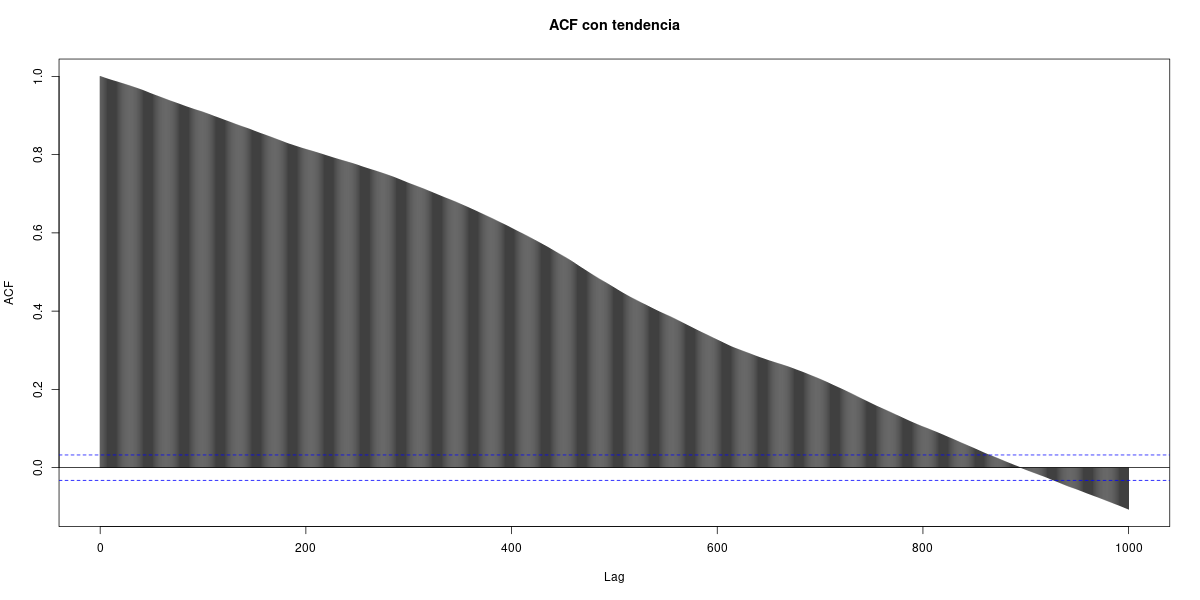

In [9]:
%%R  -w 1200 -h 600
acf(df$Close, lag.max = 1000, main = "ACF con tendencia")

La función de autocorrelación nos muestra un comportamiento de caida lenta donde aproximadamente a partir del rezago 900 toma valores negativos, esto mostrando que tiene caracteristicas de <span style="color:yellow"> *caminata aleatoria*</span>.

# 1. Estabilizar varianza.

En esta sección se buscará una herramienta para estabilizar la varianza, siempre y cuando pareciera que no se encuentre estabilizada.

#### Familia de transformaciones Box-Cox:

En ocasiones la serie presenta varianza marginal no constante a lo largo del tiempo, lo cual hace necesario tener en cuenta tal característica. En este caso, se siguiere hacer una transformación de potencia para estabilizar la varianza. Esta familia de transformaciones se llaman transformaciones Box-Cox.

$$
    f_{\lambda}(u_{t})= \begin{cases}
        \lambda^{-1}(u^{\lambda}_{t}-1), &  \text{si  $u_{t} \geq 0$, para $\lambda>0$,}\\
        \ln(u_{t}), &\text{ si $u_{t}>0$, para $\lambda=0$}.
    \end{cases}
$$
<span style="color:red">**Nota**:</span> Si el lambda calculado es muy cercano a 1, se recomienda no hacer Box-cox

## 1.1. Estimación de $\lambda$

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



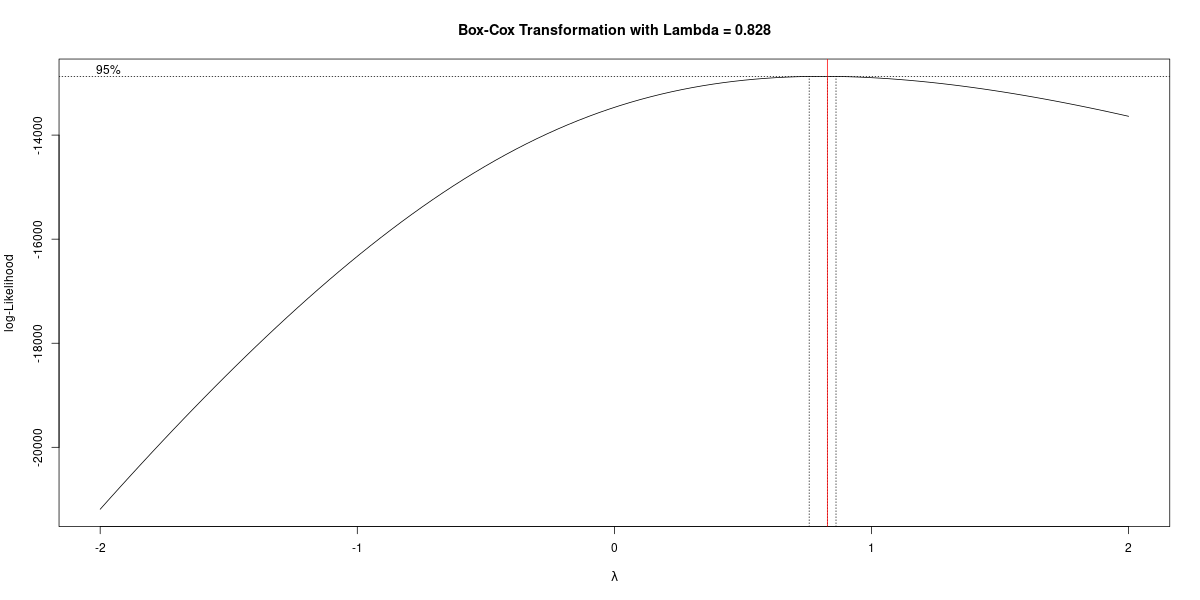

In [10]:
%%R -w 1200 -h 600

library(forecast)
library(MASS)
# por intervalo
b <- boxcox(df$Close ~ 1)
lambda <- b$x[which.max(b$y)]

title(main = paste("Box-Cox Transformation with Lambda =", round(lambda, 3) ))
abline(v = lambda, col = "red")

Al tener un valor lambda de 0.828 según R o 0.8088 segun python, se realiza la transformación Box-Cox a la serie de tiempo.

## 1.2. Grafico Box-Cox

In [11]:
from scipy.stats import boxcox

df_completo['BoxCox_Close'], lambda_value = boxcox(df_completo['Close']) 
print(lambda_value)
plot_(f'Estabilización de la Varianza (Box-cox λ ={lambda_value:.3f} )', (df_completo.index, df_completo["Close"], "Datos Originales"),
      (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"))

0.8088767520459322


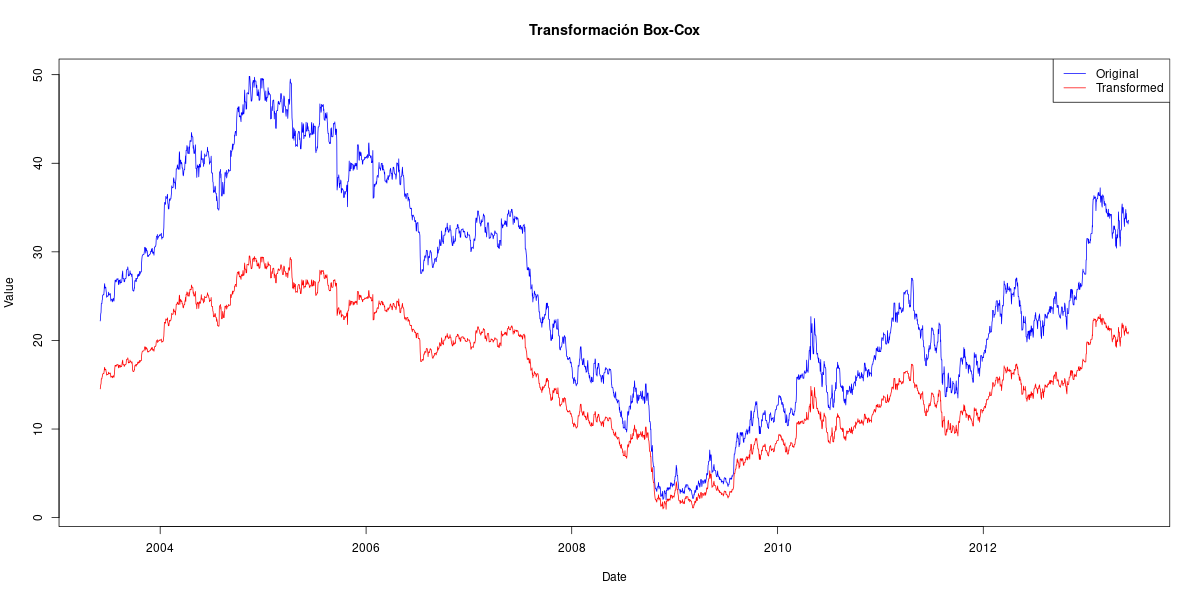

In [12]:
%%R -w 1200 -h 600

transformed_data <- forecast::BoxCox(df$Close, lambda = lambda)
plot(df$Date, df$Close, type = "l", col = "blue", ylim = range(c(df$Close, transformed_data)), 
     xlab = "Date", ylab = "Value", main = paste("Transformación Box-Cox"))
lines(df$Date, transformed_data, col = "red")
legend("topright", legend = c("Original", "Transformed"), col = c("blue", "red"), lty = 1)

# 2. Estimación de la tendencia

## 2.1 Loess

LOESS (Locally Estimated Scatterplot Smoothing) es un método no paramétrico que estima la tendencia de una serie temporal al ajustar múltiples regresiones lineales en pequeñas ventanas de datos a lo largo de la serie. En cada ventana, se calcula una regresión lineal utilizando solo los puntos de datos cercanos, ponderándolos según su distancia al punto central. Luego, se combina estos ajustes locales para generar una curva suave que captura la tendencia general en la serie sin suponer una forma específica para la tendencia, lo que lo hace flexible y adecuado para datos con relaciones no lineales.

In [13]:
from statsmodels.nonparametric.smoothers_lowess import lowess


frac = 0.05  
smoothed_values = lowess(df_completo['BoxCox_Close'], df_completo.index, frac=frac, it=0)
trend_removed = df_completo['BoxCox_Close'] - smoothed_values[:, 1]

plot_('Eliminación de Tendencia por Lowees', (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"),
      (df_completo.index, smoothed_values[:, 1], "Suavizado"),
      (df_completo.index, trend_removed, "Sin Tendencia"))
      

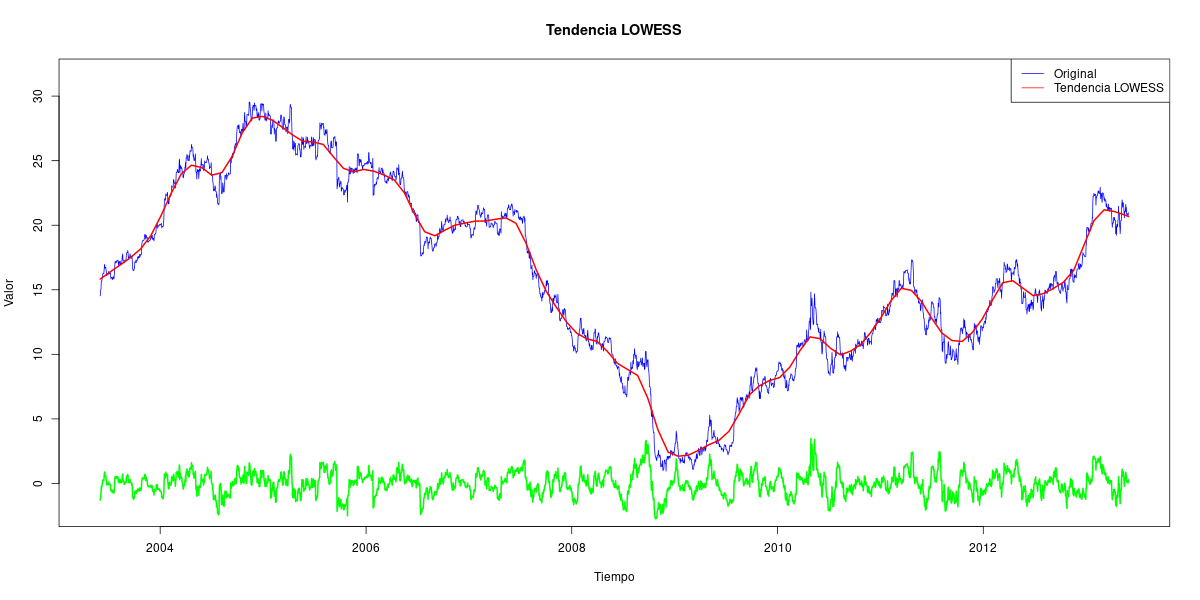

In [14]:
%%R -w 1200 -h 600

# Supongamos que tienes un dataframe df con una columna llamada 'Index'

# Calcular LOWESS
trend_lowess_R <- lowess(transformed_data,  f = 0.05, iter = 0)
trend_removed <- transformed_data - trend_lowess_R$y

# Crear un gráfico de la serie original y la tendencia LOWESS
plot(df$Date, transformed_data, type='l', col='blue', xlab='Tiempo', ylab='Valor', 
     main='Tendencia LOWESS', ylim=c(-2, max(transformed_data)+2))
lines(df$Date, trend_lowess_R$y, col='red', lwd=2)
lines(df$Date, trend_removed, col='green', lwd=2)
legend('topright', legend=c('Original', 'Tendencia LOWESS'), col=c('blue', 'red'), lty=1)



Attaching package: ‘astsa’

The following object is masked from ‘package:forecast’:

    gas



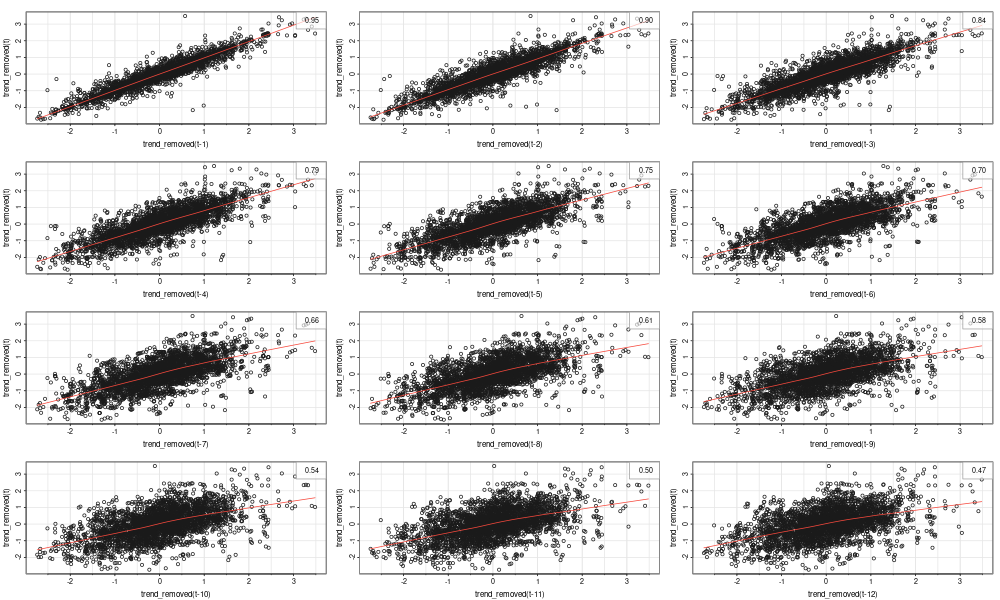

In [15]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(trend_removed, 12)

Al analizar los retardos en la serie sin tendencia utilizando el método LOESS, se observa una alta correlación con los lags, comenzando con un valor de 0.95 que disminuye gradualmente hasta llegar a 0.47 en el lag 12. Esto indica que la serie presenta una fuerte autocorrelación con sus valores anteriores, sugiriendo un comportamiento característico de una <span style="color:yellow">caminata aleatoria</span>.

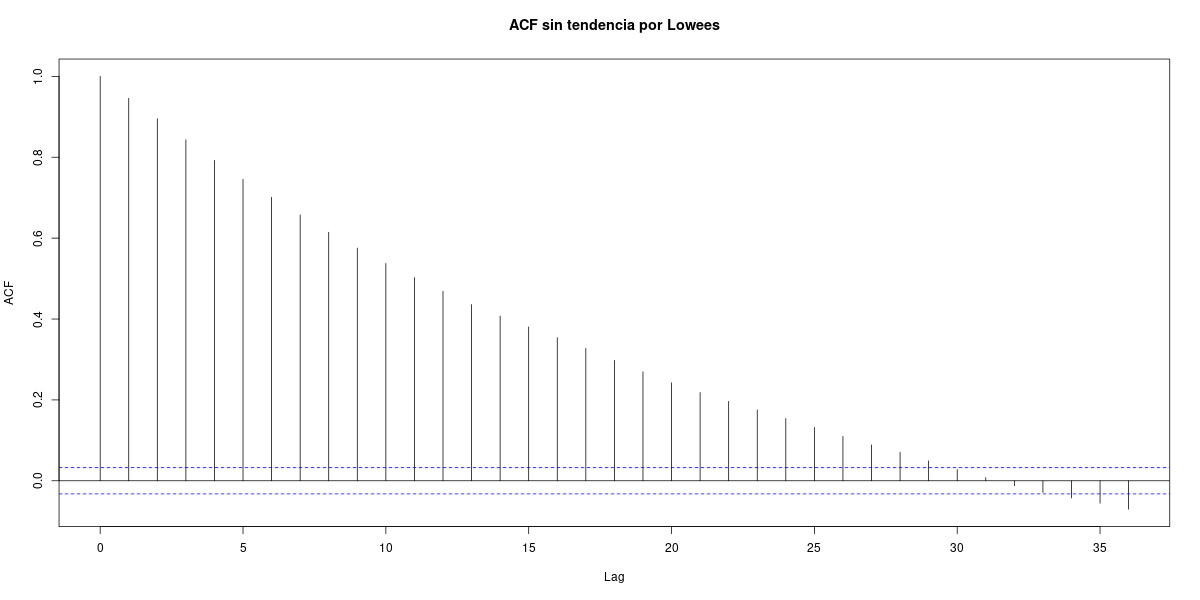

In [16]:
%%R -w 1200 -h 600

acf(trend_removed, lag.max = 36, main = "ACF sin tendencia por Lowees")

Comparado con el ACF con tendencia, se observa como cae a una mayor velocidad la correlación, mosntrando que la tendencia juega un papel fundamental en la valoración de los lags.

$time.lag
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1] 2.16876334 1.10411823 0.81582604 0.64199208 0.52783331 0.44243387
 [7] 0.37815105 0.32388518 0.28052208 0.24208667 0.21095787 0.18730892
[13] 0.16843275 0.15358527 0.14179375 0.12661261 0.11761936 0.10540529
[19] 0.09606464 0.09275556 0.09295149 0.09206252 0.08627298 0.08111405
[25] 0.07600889 0.07026646 0.06729095 0.06754448 0.06816549 0.06286024
[31] 0.06009198 0.05209213 0.05098501 0.05512315 0.05938976 0.06746769
[37] 0.06013544 0.05865953 0.05929873 0.06263220 0.06754617 0.07184496
[43] 0.07738072 0.07693398 0.07950386 0.08182324 0.08484555 0.09036072
[49] 0.09833396 0.10150996 0.10200830

$units
[1] "Nats"

$n.partitions
[1] 15

attr(,"class")
[1] "mutualInf"


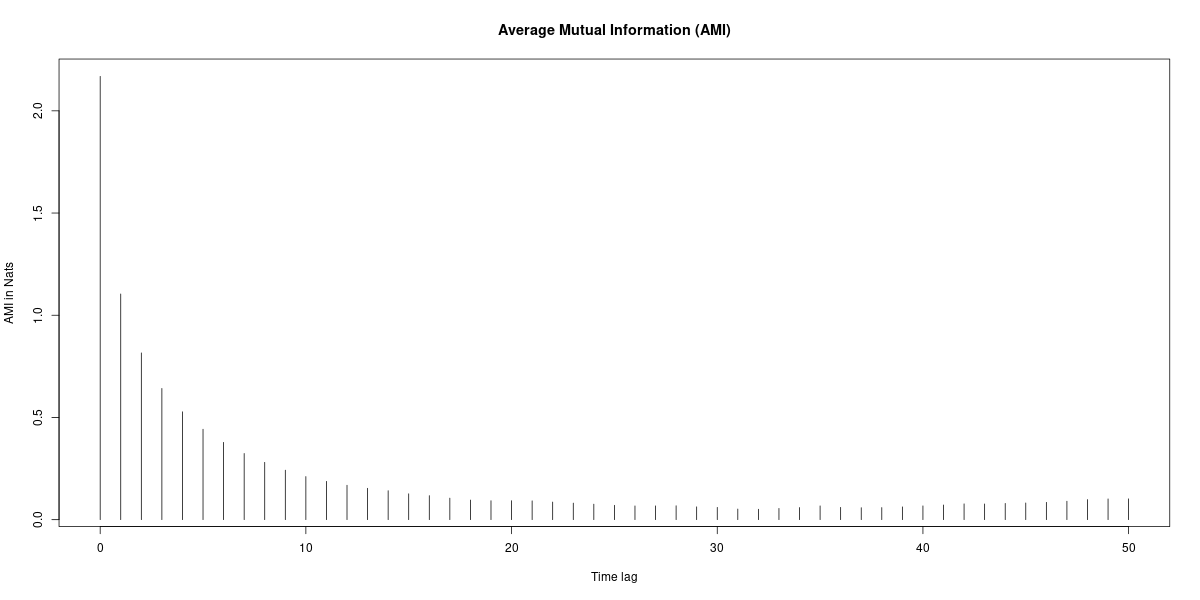

In [17]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(trend_removed,lag.max = 50, main="Información mutua")

## 2.2 Diferencia ordinaria



Apliquemos una diferencia ordinaria de orden 1 a la serie

$$
\nabla^1 Y_t=(1-B)^1 Y_t=Y_t-Y_{t-1}
$$

In [18]:
Close_diff = df_completo['BoxCox_Close'].diff()

plot_('Diferenciación de la Serie Temporal', (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"),
      (df_completo.index, Close_diff, "Diferencia Ordinaria"))

In [19]:
%R -i Close_diff

In [20]:
%%R

Close_diff <- na.omit(Close_diff)

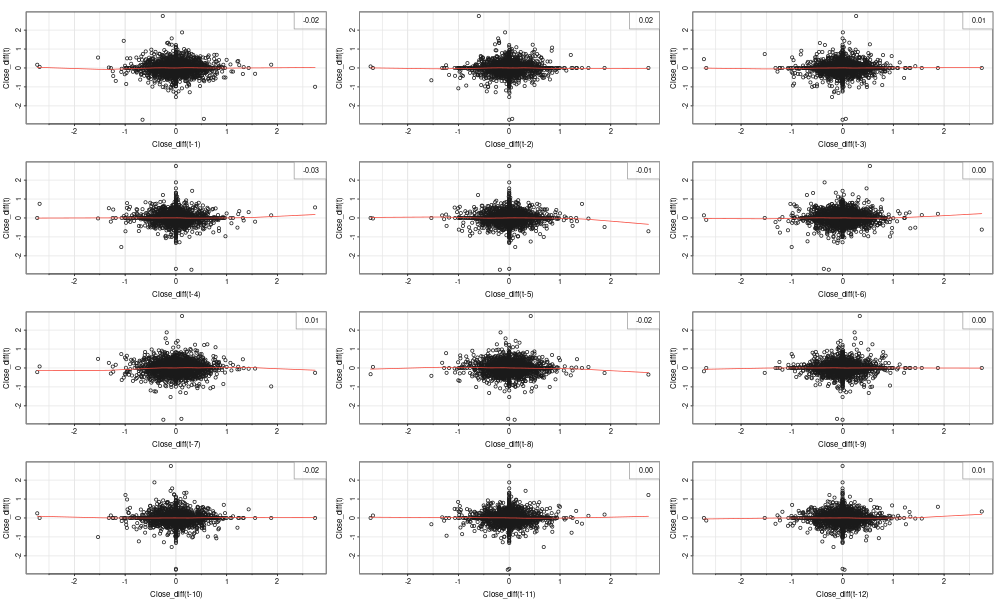

In [21]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(Close_diff, 12)

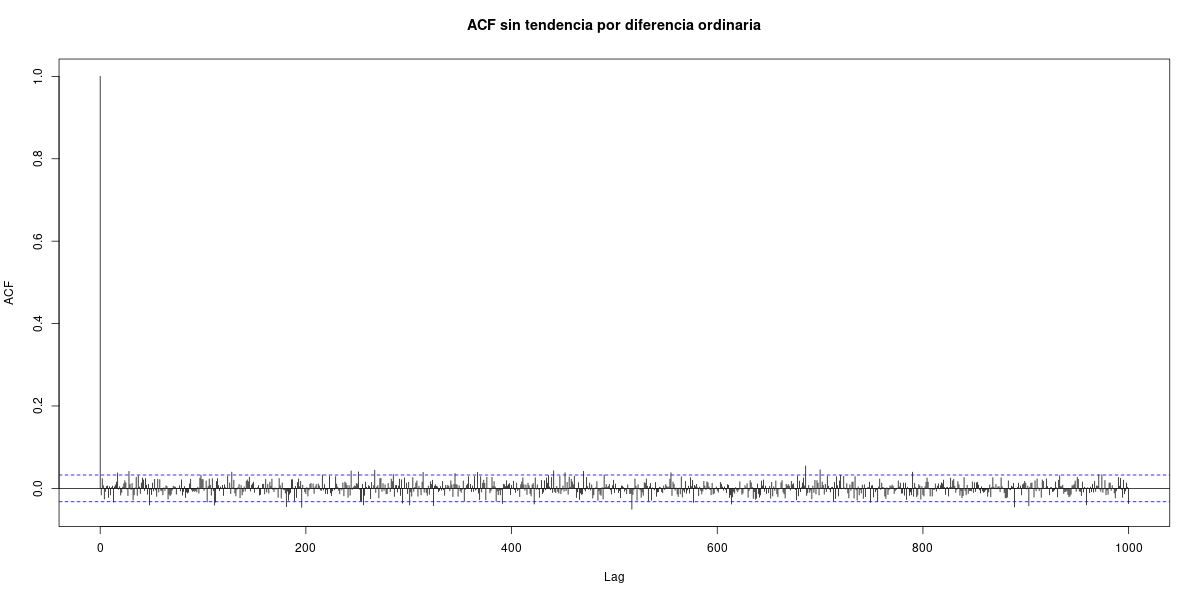

In [22]:
%%R -w 1200 -h 600

acf(Close_diff, lag.max = 1000, main = "ACF sin tendencia por diferencia ordinaria")

$time.lag


 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1]  1.0645073074  0.0157784677  0.0146086282  0.0088962959  0.0141649340
 [6]  0.0105479860  0.0200940875  0.0422293637  0.0136133227  0.0119989806
[11]  0.0136966302  0.0122210175  0.0080480330  0.0160195399  0.0401346283
[16]  0.0133572206  0.0070922366  0.0113458166  0.0147520653  0.0063603360
[21]  0.0143147928  0.0361337071  0.0091688083  0.0066329830  0.0091387718
[26]  0.0077634964  0.0028407007  0.0069283208  0.0342453973  0.0053206932
[31]  0.0049093220  0.0071150393  0.0058866239  0.0011461898  0.0077305448
[36]  0.0258905017  0.0066000584  0.0034445281  0.0040293735  0.0056650709
[41]  0.0050621976  0.0076137212  0.0252890549  0.0043874469 -0.0019225192
[46]  0.0009761359  0.0011879783 -0.0045821192  0.0010027146  0.0244232007
[51]  0.0024362146

$units
[1] "Nats"

$n.partitions
[1] 15



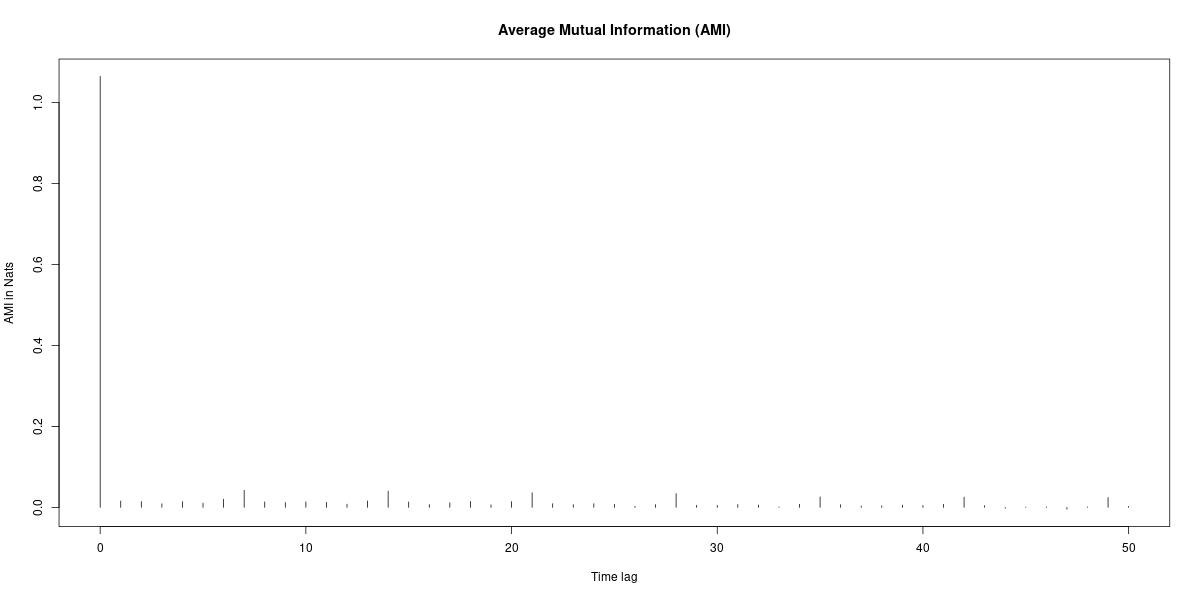

In [23]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(Close_diff,lag.max = 50, main="Información mutua de la diferencia ordinaria")

Al comparar los retardos, la **Función de Autocorrelación** (ACF) y la **Información Mutua Promedio** (AMI) de la serie temporal diferenciada con la serie sin tendencia suavizada por LOESS, se observa un comportamiento interesante. En la serie diferenciada, se logra eliminar casi por completo cualquier posible correlación con los *lags* anteriores. Esto significa que las dependencias temporales, que son evidentes en la serie sin tendencia, desaparecen tras el proceso de diferenciación ordinaria, <span style="color:red">perdiéndose una gran cantidad de información</span> sobre las relaciones que existían entre los valores pasados y futuros. En cambio, la serie suavizada por *LOESS* aún preserva las dependencias temporales, permitiendo que se pueda analizar la autocorrelación y detectar patrones en los *lags*, los cuales son importantes para predecir comportamientos futuros.

# 3. Estacionariedad

Para analizar la estacionalidad es de principal interés revisar como es el comportamiento de medidas centrales sobre el tiempo tomando como base la frecuencia natural de la serie, en este caso diario.

In [24]:
df_completo['Trend_Removed'] = trend_removed
df_completo.reset_index(inplace=True)
df_completo['Day_Name'] = df_completo['Date'].dt.day_name()
df_completo

,Date,Close,BoxCox_Close,Trend_Removed,Day_Name
0,2003-06-02,22.200001,13.939507,-1.218252,Monday
1,2003-06-03,22.400000,14.050000,-1.122872,Tuesday
2,2003-06-04,23.000000,14.380359,-0.807604,Wednesday
3,2003-06-05,23.150000,14.462690,-0.740344,Thursday
4,2003-06-06,24.150000,15.008996,-0.209087,Friday
...,...,...,...,...,...
3647,2013-05-27,33.340000,19.850442,0.118335,Monday
3648,2013-05-28,33.490002,19.927149,0.202845,Tuesday
3649,2013-05-29,33.139999,19.748064,0.031559,Wednesday
3650,2013-05-30,33.490002,19.927149,0.218439,Thursday


In [25]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series, name):
    result = adfuller(series.dropna())
    print(f'Resultados de la prueba de Dickey-Fuller para {name}:')
    print(f'Estadístico de prueba ADF: {result[0]}')
    print(f'Valor p: {result[1]}')
    print('Valores críticos:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    if result[1] <= 0.05:
        print(f"\nConclusión: Rechazamos la hipótesis nula.")
        print(f"La serie {name} es estacionaria (no tiene raíz unitaria).")
    else:
        print(f"\nConclusión: No podemos rechazar la hipótesis nula.")
        print(f"La serie {name} no es estacionaria (tiene raíz unitaria).")
    print("\n")

# Realizar la prueba para cada serie
print("Prueba de Dickey-Fuller Aumentada (ADF)")
print("---------------------------------------")

perform_adf_test(df_completo['Close'], "original")
perform_adf_test(df_completo['BoxCox_Close'], "transformada Box-Cox")

Prueba de Dickey-Fuller Aumentada (ADF)
---------------------------------------
Resultados de la prueba de Dickey-Fuller para original:
Estadístico de prueba ADF: -1.1769339805745826
Valor p: 0.6834386065530834
Valores críticos:
	1%: -3.4321423592450104
	5%: -2.862331964581231
	10%: -2.567191574740688

Conclusión: No podemos rechazar la hipótesis nula.
La serie original no es estacionaria (tiene raíz unitaria).


Resultados de la prueba de Dickey-Fuller para transformada Box-Cox:
Estadístico de prueba ADF: -1.1437278429524775
Valor p: 0.6973226326790131
Valores críticos:
	1%: -3.4321423592450104
	5%: -2.862331964581231
	10%: -2.567191574740688

Conclusión: No podemos rechazar la hipótesis nula.
La serie transformada Box-Cox no es estacionaria (tiene raíz unitaria).




Al tener raiz unitaria, se observa que tiene un comportamiento similar a <span style="color:yellow">caminata aleatoria</span>, por lo que no se espera que se obtenga algun tipo de estacionalidad.

# 4. Estacionalidad

In [26]:
import plotly.express as px


# Crear el box plot utilizando plotly.express
fig = px.box(df_completo, x='Day_Name', y='Trend_Removed', title='Box Plot de trend_removed por Día de la Semana', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Día de la Semana', title_x=0.5)
fig.show()

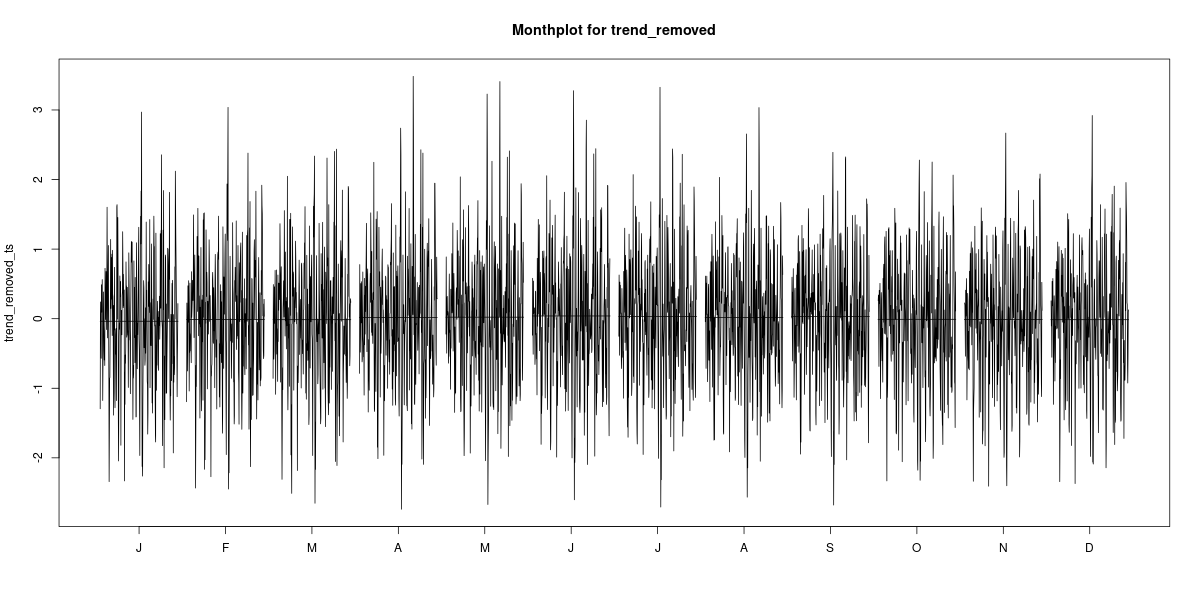

In [27]:
%%R -w 1200 -h 600
# Convert the Date column to Date class if it is not already

trend_removed_ts <- ts(trend_removed, start = start(df$Date), frequency = 12)
monthplot(trend_removed_ts, main = 'Monthplot for trend_removed')

In [28]:
# Extraer el mes de la fecha
df_completo['Month'] = df_completo['Date'].dt.month_name()

# Crear el box plot utilizando plotly.express
fig = px.box(df_completo, x='Month', y='Trend_Removed', title='Box Plot de trend_removed por Mes', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Mes', title_x=0.5)
fig.show()


In [29]:
# Extraer el año de la fecha
df_completo['Year'] = df_completo['Date'].dt.year

# Crear el box plot utilizando plotly.express
fig = px.box(df_completo, x='Year', y='Trend_Removed', title='Box Plot de trend_removed por Año', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Año', title_x=0.5)
fig.show()

Como se observa en los diagramas de cajas y medias, no se encuentra grandes cambios a nivel temporal de estas medidas y por lo tanto, no se espera una estacionalidad en la serie.

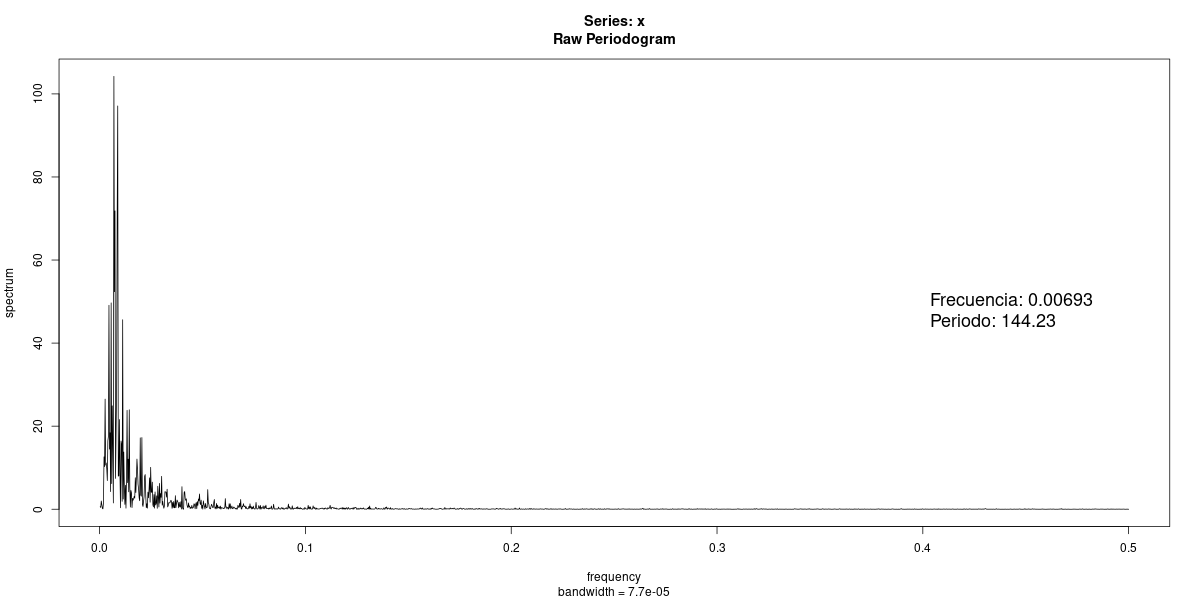

In [30]:
%%R -w 1200 -h 600

# Calculate the periodogram for data2
Periogram <- spectrum(as.numeric(trend_removed_ts), log = 'no')

# Get the index where the periodogram maximizes
ubicacion <- which.max(Periogram$spec)

# Get the frequency value at the index where the periodogram maximizes
max_freq <- Periogram$freq[ubicacion]

# Calculate the corresponding period
max_period <- 1 / max_freq

# Plot the periodogram for data2

# Add text annotation for frequency and period
text(.4, 50, sprintf("Frecuencia: %s", round(max_freq, 5)), pos = 4, cex = 1.5)
text(.4, 45, sprintf("Periodo: %s", round(max_period, 2)), pos = 4, cex = 1.5)

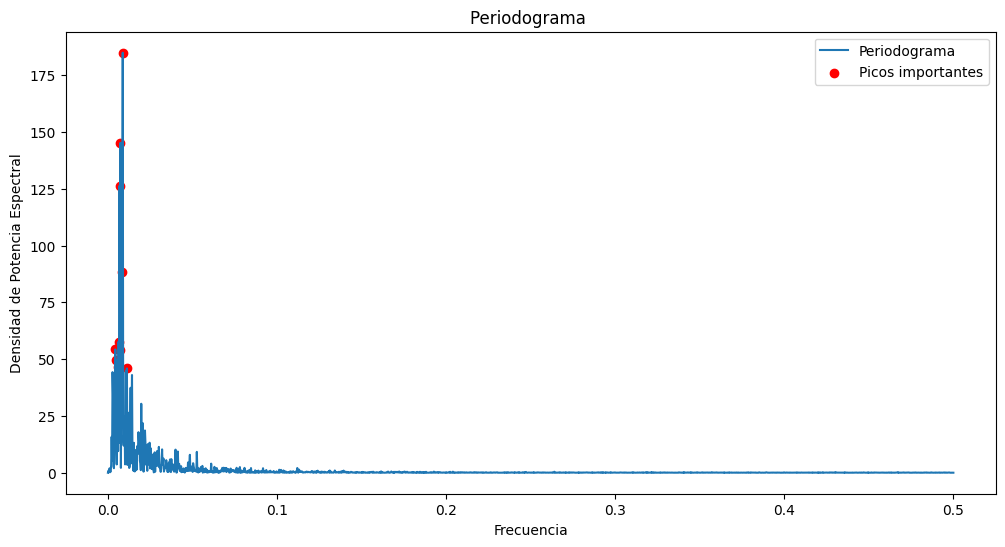

Los 10 Picos mas grandes para el periodograma son:


,0,1,2,3,4,5,6,7,8,9
Frecuencia,0.008762,0.007393,0.006846,0.008488,0.006298,0.004381,0.007119,0.004929,0.005750,0.011227
Periodo,114.125000,135.259259,146.080000,117.806452,158.782609,228.250000,140.461538,202.888889,173.904762,89.073171
Densidad de Potencia Espectral,184.924098,145.230325,126.337694,88.428242,57.711150,54.288351,54.014783,49.639038,46.455320,45.906499


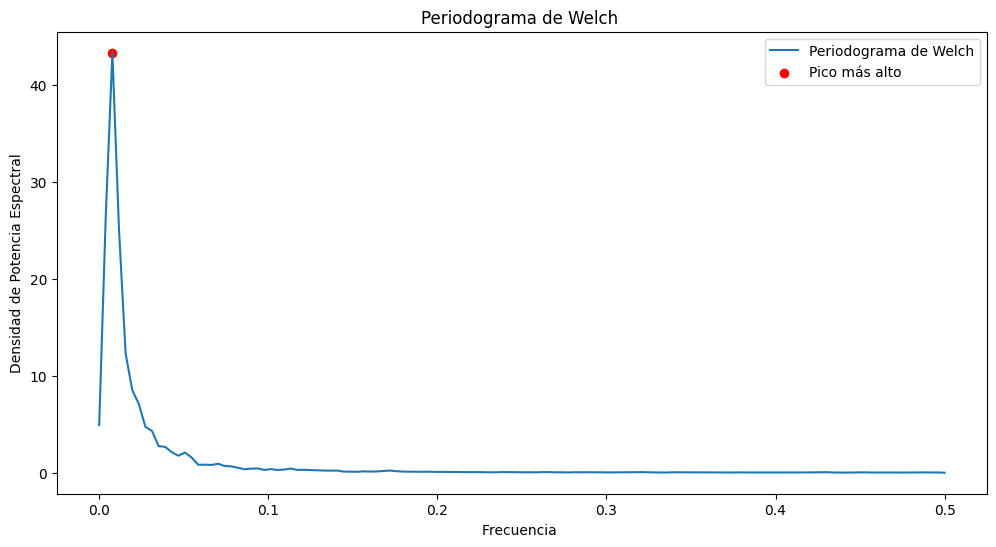

El pico más notorio se da: 
 - Frecuencia: 0.0078125  
                                    
 - Periodo: 128.0 
                                    
 - Densidad de Potencia Espectral: 43.35889839122304


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import heapq


# Calcular el periodograma
f, Pxx_den = signal.periodogram(trend_removed)

# Encontrar los picos más importantes
peaks_indices = heapq.nlargest(10, range(len(Pxx_den)), key=Pxx_den.__getitem__)
f_freq = f[peaks_indices]
densidad = Pxx_den[peaks_indices]
f_period = 1 / f[peaks_indices]

# Calcular el periodograma de Welch
f_welch, Pxx_den_welch = signal.welch(trend_removed)

# Encontrar el pico más alto del periodograma de Welch
max_index_value_welch = np.argmax(Pxx_den_welch)
frecuencia_max_welch = f_welch[max_index_value_welch]
frecuencia_pico_welch = 1 / frecuencia_max_welch




# Graficar el periodograma
plt.figure(figsize=(12, 6))
plt.plot(f, Pxx_den, label='Periodograma')
plt.scatter(f[peaks_indices], Pxx_den[peaks_indices], color='red', label='Picos importantes')

plt.xlabel('Frecuencia')
plt.ylabel('Densidad de Potencia Espectral')
plt.title('Periodograma ')
plt.legend()
plt.show()

print('Los 10 Picos mas grandes para el periodograma son:')

# Crear DataFrame con las frecuencias y los periodos
data = {'Frecuencia': f_freq, 'Periodo': f_period, 'Densidad de Potencia Espectral': densidad}
df_frecuencias_periodos = pd.DataFrame(data).sort_values(by='Densidad de Potencia Espectral', ascending=False)

# Mostrar el DataFrame
display(df_frecuencias_periodos.T)

# Graficar el periodograma de Welch
plt.figure(figsize=(12, 6))
plt.plot(f_welch, Pxx_den_welch, label='Periodograma de Welch')
plt.scatter(frecuencia_max_welch, Pxx_den_welch[max_index_value_welch], color='red', label='Pico más alto')

plt.xlabel('Frecuencia ')
plt.ylabel('Densidad de Potencia Espectral')
plt.title('Periodograma de Welch ')
plt.legend()
plt.show()

print(f"""El pico más notorio se da: \n - Frecuencia: {frecuencia_max_welch}  
                                    \n - Periodo: {frecuencia_pico_welch} 
                                    \n - Densidad de Potencia Espectral: {Pxx_den_welch[max_index_value_welch]}""")

In [6]:
print("Teniendo presente que un año es aproximadamente 360 días, se observa que según los resultados de los diferentes periodogramas:\n")
print(f"El primer periodograma determina un {144.23/365:.2f}% de un año ")
print(f"El segundo periodograma determina un {114.125/365:.2f}% de un año")
print(f"El tercero periodograma determina un {128.0/365:.2f}% de un año")

print(f"\n Tal que su media indica {(144.23 + 144.125 + 128.0)/3:.2f} días, lo que equivale a un {((144.23 + 144.125 + 128.0)/3)/365:.2f} años")


Teniendo presente que un año es aproximadamente 360 días, se observa que según los resultados de los diferentes periodogramas:

El primer periodograma determina un 0.40% de un año 
El segundo periodograma determina un 0.31% de un año
El tercero periodograma determina un 0.35% de un año

 Tal que su media indica 138.78 días, lo que equivale a un 0.38 años
